# <center> <font color = "#00A0B0"> **Prédiction du diabète**

### <font color = "#00A0B0"> **Objectif :** 

<font color = "b"> Prédire si une patiente souffre de diabète sur la base de certains paramètres cliniques.

#### <font color = "#CF5C78"> **Source des données :** <font color = "b"> [National Institute of Diabetes and Digestive and Kidney](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset).

#### <font color = "#00A0B0"> **Importation des librairies et modules**

In [20]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import pickle
import warnings
warnings.filterwarnings('ignore')
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2024-02-18 14:33:03 +01:00)


#### <font color = "#00A0B0"> **Chargement et exploration des données**

In [21]:
# Chargement des données
data = pd.read_csv("diabetes.csv")

time: 0 ns (started: 2024-02-18 14:33:03 +01:00)


In [22]:
# Visualisation des 10 premières lignes du jeu de données
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1
5,5,116,74,0,0,25.6,0.20,30,0
6,3,78,50,32,88,31.0,0.25,26,1
7,10,115,0,0,0,35.3,0.13,29,0
8,2,197,70,45,543,30.5,0.16,53,1
9,8,125,96,0,0,0.0,0.23,54,1


time: 0 ns (started: 2024-02-18 14:33:03 +01:00)


#### <font color = "#CF5C78"> _**Description des variables**_ <font color = "b">

* Pregnacies : nombre de grossesses ;
* Glucose : taux de glucose dans le sang ;
* BlooPressure : mesure de la pression artérielle ;
* SkinThickness : épaisseur de la peau ;
* Insulin : taux d'insuline dans le sang
* BMI : indice de masse corporelle
* DiabetesPedigreeFunction : Pourcentage de diabète
* Age : âge du patient ;
* Outcome :  résultat final, 1 signifie Oui (diabétique) et 0, Non (pas de diabète).

Le tableau présente un ensemble de données sur le diabète. Il contient des informations sur 768 patientes, dont le nombre de grossesses, la glycémie, la tension artérielle, l'épaisseur de la peau, le niveau d'insuline, l'IMC, la fonction du pedigree du diabète et l'âge. La dernière colonne indique si le patient est diabétique ou non.

In [23]:
# informations basiques sur le jeu de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
time: 0 ns (started: 2024-02-18 14:33:03 +01:00)


In [24]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

time: 16 ms (started: 2024-02-18 14:33:03 +01:00)


In [25]:
data.duplicated().sum()

0

time: 0 ns (started: 2024-02-18 14:33:03 +01:00)


Toutes les variables sont de type numérique et aucune d'elles ne contient de valeur manquante. Le jeu de données ne contient aucun doublon.

In [26]:
# Statistique descriptif
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


time: 16 ms (started: 2024-02-18 14:33:03 +01:00)


Au sein de cette population,
* La moyenne d'âge est de 33 ans,
* L'IMC (BMI) moyen est d'environ 32kg/m².
* La natalité est plutôt élevé, avec une moyenne de 4 enfants par patiente.
En observant les valeurs minimales des variables, on peut noter la présence de quelques des chiffres "anormaux". Il est improbable que le taux de glucose, la pression artérielle, l'épaisseur de la peau, le taux d'insuline sanguin et l'IMC aient des valeurs nulles. Ces valeurs nulles devront être remplacées.

#### <font color = "#CF5C78"> _**Analyse de la corrélation entre les variables**_

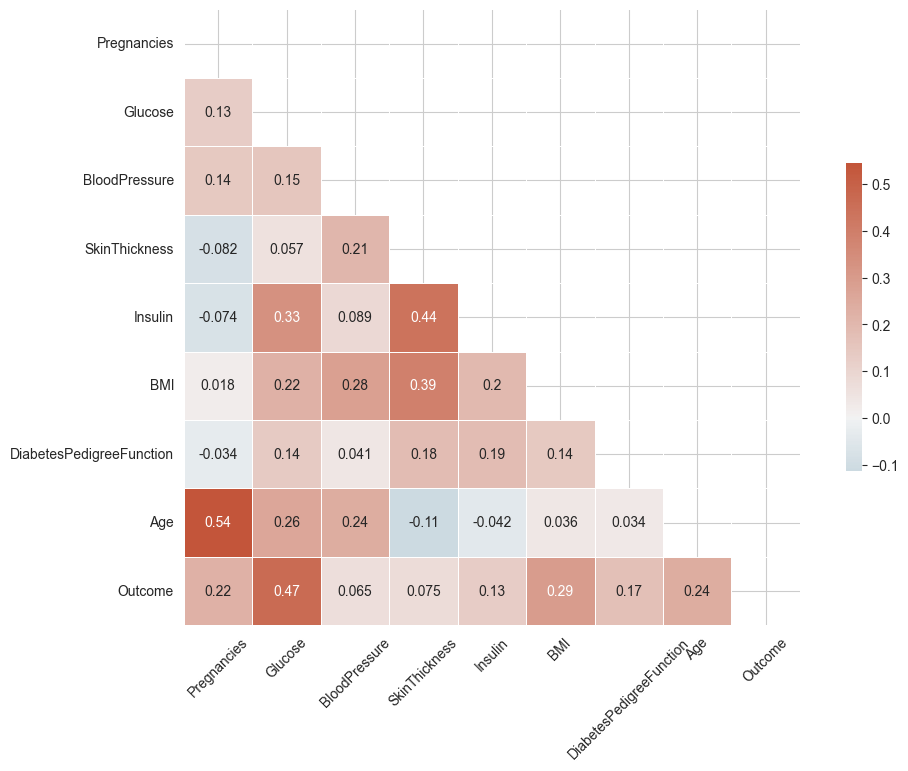

time: 312 ms (started: 2024-02-18 14:33:03 +01:00)


In [27]:
# Calcul de la matrice de corrélation
corr = data.corr()

# Génération d'un masque pour le haut de la matrice de corrélation
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuration de l'affichage de la matrice de corrélation
f, ax = plt.subplots(figsize=(12, 8))

# Génération d'une palette de couleurs divergentes
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Affichage de la matrice de corrélation
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# rotation de l'axe des x
plt.xticks(rotation=45)
plt.show()

* Toutes les corrélations sont positives, ce qui signifie que lorsque la valeur d'une variable augmente, la valeur de l'autre variable tend également à augmenter.
* Cette matrice montre qu'il existe un certain nombre de relations entre les variables du jeu de données. Cependant, ces relations sont plutôt faibles, avec des valeurs inférieures à 0,5.
* Les personnes ayant un IMC plus élevé ont tendance à avoir une glycémie plus élevée et un niveau d'insuline plus élevé.
* Les personnes diabétiques ont tendance à avoir une glycémie plus élevée et une fonction du pedigree du diabète plus importante.
* Le nombre de grossesse a tendance à augmenter avec l'âge
* Le taux d'insuline sanguin et l'IMC ont tendence à augmenter avec l'épaisseur de la peau.

Nous devons être prudent sur le fait que la corrélation n'implique pas la causalité.

#### <font color = "#CF5C78"> _**Analyse de la distribution des variables**_

In [28]:
# Observation de la distribution de la variable cible ("Outcome")

target_distribution = data.Outcome.value_counts()
labels = ['Non diabétique', 'Diabétique']

fig = go.Figure(data = [
        go.Pie(values = target_distribution, labels = labels, textinfo = 'label+percent+value' , pull = [0,0.04])], 
         layout = go.Layout(title = 'Distribution of Outcome Variable'))

fig.show()

time: 16 ms (started: 2024-02-18 14:33:04 +01:00)


Il y a un déséquilibre entre les deux groupes de patientes : 35% de diabétiques contre 65% de non diabétiques. Dans un premier temps, nous allons entraîner nos modèles avec les données déséquilibrées pour voir comment ils se comporte. Et si nécessaire, non procèdera un rééquilibrage.

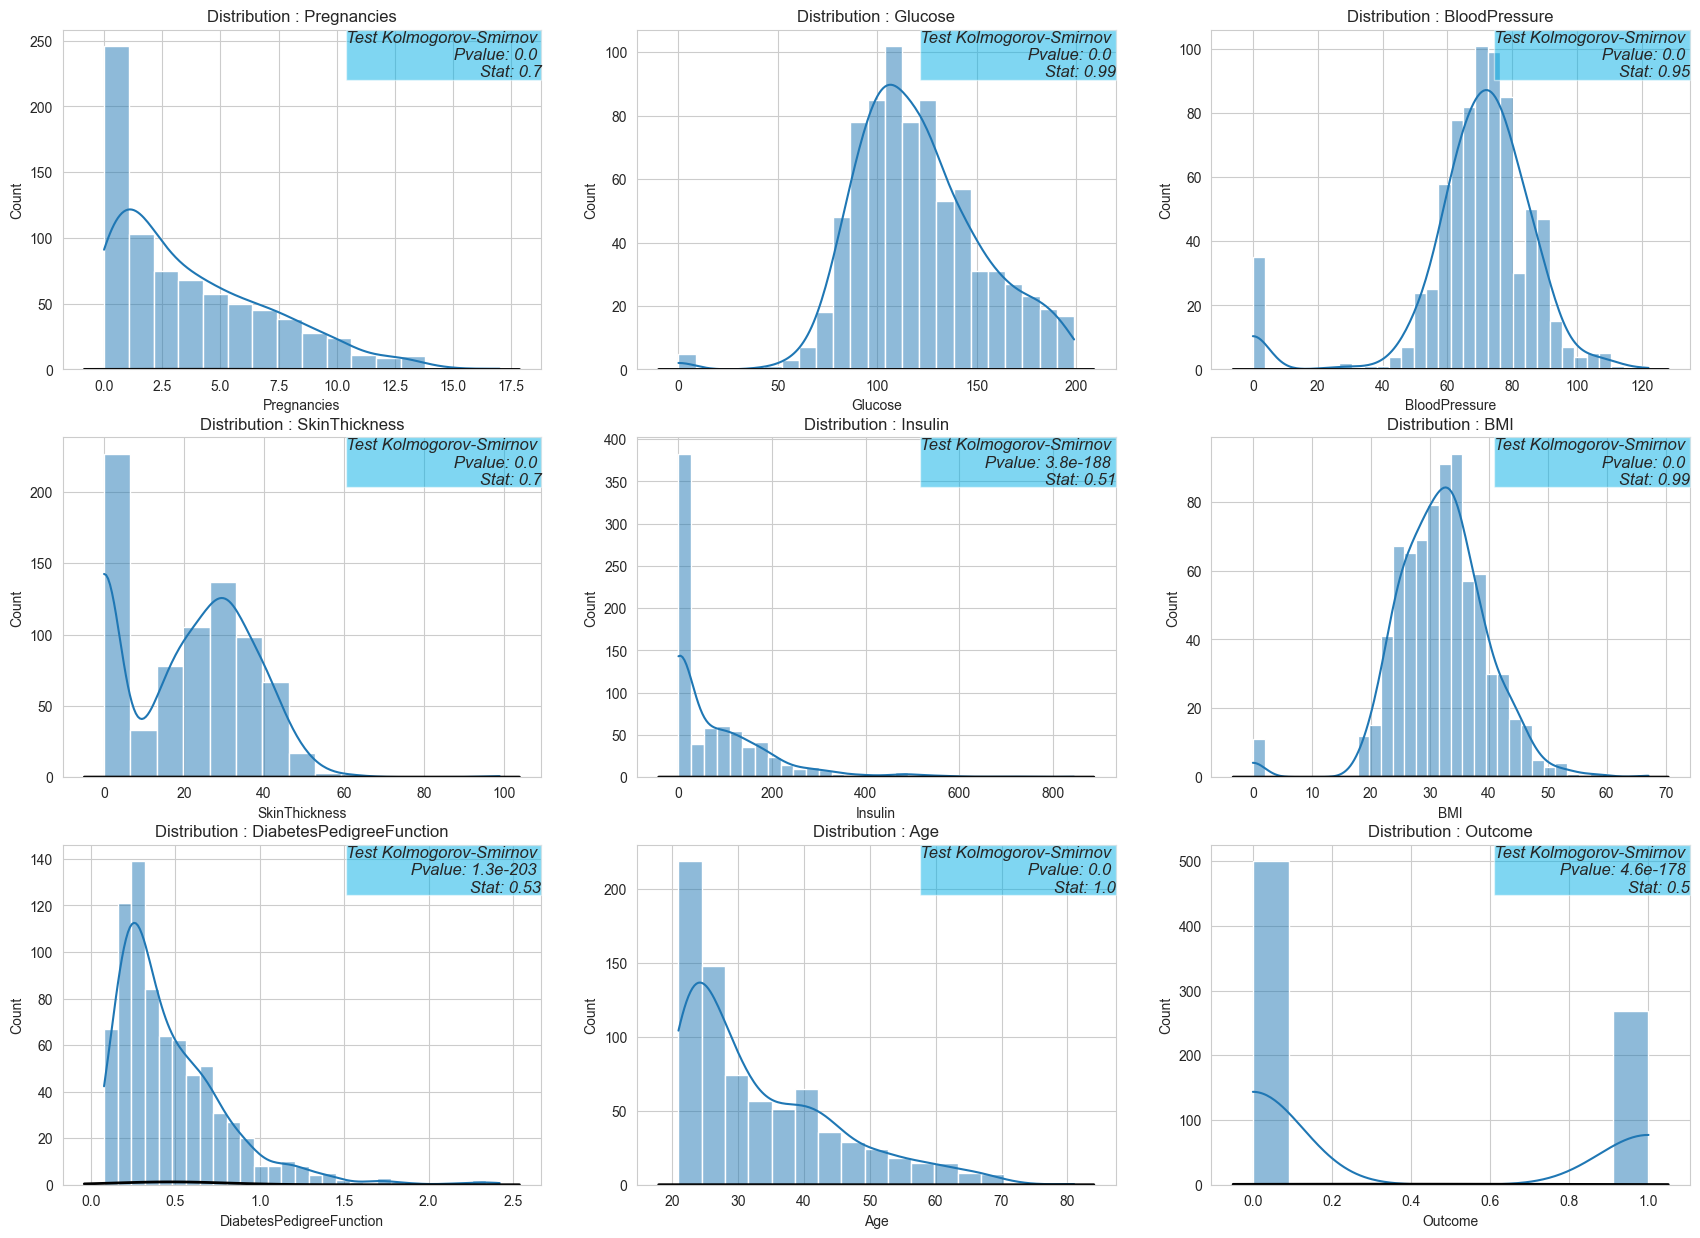

time: 2.03 s (started: 2024-02-18 14:33:04 +01:00)


In [29]:
# Observation de la distribution des variables

# Paramètres de la figure
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,15))

sub = 0
for i in range(len(data.columns)):
    fig.add_subplot(3,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = data.columns[i]
    kstest = stats.kstest(data[colonne],'norm')  # Test Kolmogorov-Smirnov pour la distribution normale
    
    ax = sns.histplot(data[colonne], kde=True)
    
    # Ajustement de la distribution normale
    params = stats.norm.fit(data[colonne])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, *params) 
    
    # Tracé de la distribution normale ajustée
    plt.plot(x, p, 'k', linewidth=2)
    
    ax.set_title("Distribution : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

Les variables ne présentent pas une distribution normale.

#### <font color = "#CF5C78"> _**Recherche de potentielles valeurs abbérantes**_

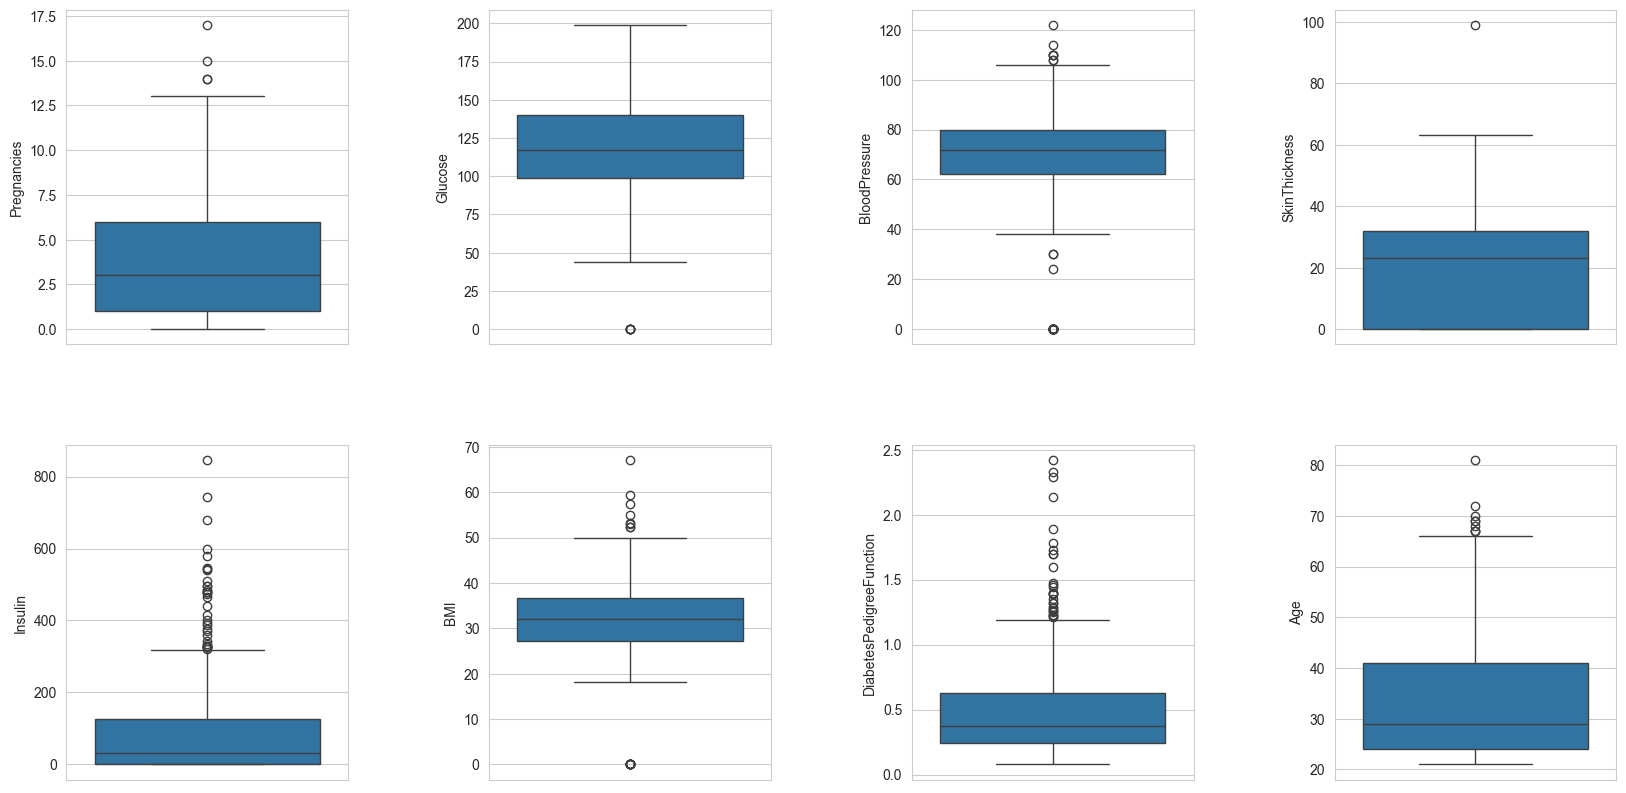

time: 750 ms (started: 2024-02-18 14:33:06 +01:00)


In [30]:
# colonnes à visualiser 
cols_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

# Création de la grille pour visualiser les tracés
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Parcours des colonnes et création des violonplots
for i, col in enumerate(cols_to_plot):
    row = i // 4
    col_index = i % 4
    sns.boxplot(y=col, data = data, ax=axs[row, col_index])

# Ajustement de l'espace entre les axes
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

* Certaines femmes ont plus de 10 enfants. Bien que cela soit relativement rare de nos jours, il n'est pas impossible de voir des familles nombreuses avec autant ou plus d'enfants
* A l'exeption des variables "Age" et "DiabetesPregnacieFunction", toutes les variables présentes des valeurs égal à 0, ce qui est quasi impossible (à l'exeption du nombre de grossesse).

In [31]:
(data["Pregnancies"]>=10).value_counts()

Pregnancies
False    710
True      58
Name: count, dtype: int64

time: 0 ns (started: 2024-02-18 14:33:07 +01:00)


#### <font color = "#00A0B0"> **Preprocessing**

#### <font color = "#CF5C78"> _**Imputation des valeurs aberrantes**_ <font color = "b"> 
Afin de remplacer les valeurs aberrantes, représentées par des valeurs nulles, nous opterons pour l'utilisation de la médiane. Cette décision découle du fait que nos variables ne suivent pas une distribution normale. Par conséquent, l'utilisation de la médiane, moins influencée par les valeurs extrêmes que la moyenne, est préférable dans ce contexte.

#### <font color = "#CF5C78"> _**Fractionnement des données**_ <font color = "b">
nous allons utiliser 70 % des données pour l'entraînement et 30 % pour l'évaluation du modèle

In [32]:
# Calcul de la médiane 

median_values = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].median()

# Remplacer les égales à O par la valeur de la médiane
data["Glucose"] = data["Glucose"].replace(0, median_values["Glucose"])
data["BloodPressure"] = data["BloodPressure"].replace(0, median_values["BloodPressure"])
data["SkinThickness"] = data["SkinThickness"].replace(0, median_values["SkinThickness"])
data["Insulin"] = data["Insulin"].replace(0, median_values["Insulin"])
data["BMI"] = data["BMI"].replace(0, median_values["BMI"])


time: 16 ms (started: 2024-02-18 14:33:07 +01:00)


In [33]:
# Suppression de la variable cible
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Taille des différents ensembles
print("Taille de l'ensemble d'entraînement:", X_train.shape)
print("Taille de l'ensemble de test:", X_test.shape)

Taille de l'ensemble d'entraînement: (614, 8)
Taille de l'ensemble de test: (154, 8)
time: 15 ms (started: 2024-02-18 14:33:07 +01:00)


#### <font color = "#00A0B0"> **Implémentation des modèles**

Pour pédire le diabète, nous allons évaluer les performances de 4 algorithmes :

1. **Régression logistique** :
   - La régression logistique est couramment utilisée pour la classification binaire, ce qui pourrait correspondre parfaitement à cette problématique où nous avez deux classes (diabétique et non diabétique).
   - Elle est rapide à entraîner et à interpréter, ce qui en fait un bon choix pour une première exploration du jeu de données.

2. **Forêts aléatoires (Random Forest)** :
   * Les forêts aléatoires sont robustes et performantes pour les tâches de classification, même avec des jeux de données de grande taille et comportant des caractéristiques hétérogènes.
   * Elles sont capables de gérer des interactions complexes entre les caractéristiques et sont moins sensibles au surajustement que les arbres de décision individuels.

3. **Gradient Boosting Machines (GBM)** :
   - Les GBM sont des algorithmes puissants pour la classification binaire, capables de capturer des relations non linéaires entre les caractéristiques et la variable cible.
   - Ils sont également résistants au surajustement et peuvent être régularisés à l'aide de paramètres tels que la profondeur de l'arbre et le taux d'apprentissage.

4. **Support Vector Machines (SVM)** :
   - Les SVM sont efficaces pour la classification binaire, en particulier lorsque les classes sont bien séparées.
   - Ils peuvent être adaptés pour gérer des jeux de données de grande dimension et sont également robustes aux valeurs aberrantes.

Ces quatre algorithmes offrent une bonne combinaison de performance, de robustesse et de capacité à gérer des problèmes de classification binaire comme la prédiction du diabète. Nous allons donc les tester sur ce jeu de données pour déterminer celui qui fonctionne le mieux dans ce cas particulier.

_**Initialisation des modèles**_ 

In [34]:
# Définition des modèles à utiliser pour la classification.
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

time: 0 ns (started: 2024-02-18 14:33:07 +01:00)


In [35]:
# Définition des métriques à évaluer
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

time: 0 ns (started: 2024-02-18 14:33:07 +01:00)


In [36]:
# Initialisation une liste pour stocker les résultats
results = []

time: 16 ms (started: 2024-02-18 14:33:07 +01:00)


_**Entraînement et évaluation des performances**_ 

In [37]:
# Boucle sur les modèles
for name, model in models.items():
    # Entraînement du modèle
    model.fit(X_train, y_train)
    
    # Prédiction sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Calcul des métriques pour le modèle
    scores = [metric(y_test, y_pred) for metric in metrics.values()]
    
    # Ajout des résultats à la liste
    results.append({'Algorithm': name, **dict(zip(metrics.keys(), scores))})

time: 578 ms (started: 2024-02-18 14:33:07 +01:00)


In [38]:
# Création d'un DataFrame à partir de la liste de résultats
results_df = pd.DataFrame(results)
# Option d'affichage du DataFrame
pd.set_option('display.precision', 2)
# Affichage des résultats
results_df

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.76,0.67,0.65,0.66
1,Random Forest,0.76,0.65,0.71,0.68
2,Gradient Boosting,0.73,0.61,0.71,0.66
3,SVM,0.77,0.72,0.56,0.63


time: 15 ms (started: 2024-02-18 14:33:07 +01:00)


#### <font color = "#CF5C78"> _**choix du modèle**_ <font color = "b">
Le score F1 est particulièrement utile dans les cas de classes déséquilibrées (comme c'est le cas ici), car il prend en compte à la fois la précision et le rappel. Il donne une idée globale de la performance du modèle en tenant compte à la fois des faux positifs et des faux négatifs, ce qui en fait une métrique équilibrée dans les cas de déséquilibre de classe.

Nous souhaitons prédire le diabète, il est important de considérer à la fois la capacité du modèle à identifier correctement les personnes diabétiques (Reacall) et à éviter de faussement identifier des personnes non diabétiques comme diabétiques (précision). Le score F1 offre un compromis entre ces deux aspects et est donc approprié pour évaluer la performance des modèles dans ce contexte.
Ainsi, le Random Forest avec un F1 Score = 0,69 est le meilleur modèle.

#### <font color = "#CF5C78"> _**Optimisation du modèle sélectionné**_

In [21]:
# Définition de la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialiser le modèle Random Forest
rf_classifier = RandomForestClassifier()

# Initialiser la recherche par grille avec validation croisée stratifiée
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv = 10, scoring='f1', n_jobs=-1)

# Effectuer la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score F1:", grid_search.best_score_)

# Utiliser le modèle avec les meilleurs paramètres pour prédire sur les données de test
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Calculer le score F1 sur les données de test
f1 = f1_score(y_test, y_pred)
print("Score F1 sur les données de test:", f1)

Meilleurs paramètres: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Meilleur score F1: 0.6737467823032203
Score F1 sur les données de test: 0.6725663716814159
time: 13min 14s (started: 2024-02-18 13:52:38 +01:00)


In [ ]:
# Sauvegarde du modèle 
pickle.dump(Random Forest, open('Random Forest.pkl', 'wb'))